# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

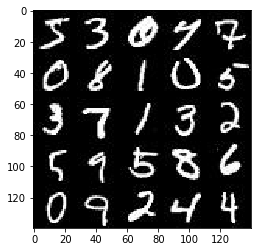

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

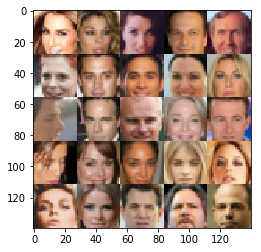

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

F:\Users\marlo\Miniconda3\envs\dog-project\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.5.0


F:\Users\marlo\Miniconda3\envs\dog-project\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='real_input') 
    z_input = tf.placeholder(tf.float32, (None, z_dim), name='z_input') 
    learning_rate = tf.placeholder(tf.float32, (None), name='learning_rate') 
    print(real_input)
    print(z_input)
    print(learning_rate)
    
    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tensor("real_input:0", shape=(?, 28, 28, 3), dtype=float32)
Tensor("z_input:0", shape=(?, 100), dtype=float32)
Tensor("learning_rate:0", dtype=float32)
Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        h1 = tf.layers.conv2d(images, filters=64, strides=2, kernel_size=5,  padding='same')
        h1 = tf.maximum(0.2 * h1, h1)
        
        h2 = tf.layers.conv2d(h1, filters=128, strides=2, kernel_size=5, padding='same')
        h2 = tf.maximum(0.2 * h2, h2)
        
        h3 = tf.layers.conv2d(h2, filters=256, strides=2, kernel_size=5, padding='same')
        h3 = tf.maximum(0.1 * h3, h3)
        
        flat = tf.reshape(h3, (-1, 4 * 4 * 256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)

    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [10]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        h1 = tf.layers.dense(z, 2 * 2 * 512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(0.2 * h1, h1)
        # 4x4x256
        
        h2 = tf.layers.conv2d_transpose(h1, filters=256, strides=2, kernel_size=5)
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(0.2 * h2, h2)
        # 7x7x128
        
        h3 = tf.layers.conv2d_transpose(h2, filters=128, strides=2, kernel_size=5, padding='same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(0.2 * h3, h3)
        # 14x14x64
        
        logits = tf.layers.conv2d_transpose(h3, filters=out_channel_dim, kernel_size=5, strides=2, padding='same')
        
        out = tf.tanh(logits)
  
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [11]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train = True)
    d_model_real, d_logits_real = discriminator(input_real, reuse = False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9))
    loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = loss_real + loss_fake
    
    return d_loss, loss
    
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [12]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    tv = tf.trainable_variables()
    discriminator = list(filter(lambda x: x.name.startswith('discriminator'), tv))
    generator = list(filter(lambda x: x.name.startswith('generator'), tv))

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        op_descriminator = tf.train.AdamOptimizer(beta1=beta1, learning_rate=learning_rate).minimize(d_loss, var_list=discriminator)
        op_generator = tf.train.AdamOptimizer(beta1=beta1, learning_rate=learning_rate).minimize(g_loss, var_list=generator)
    
    return op_descriminator, op_generator


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [14]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Tensor("real_input:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("z_input:0", shape=(?, 100), dtype=float32)
Tensor("learning_rate:0", dtype=float32)
Epoch 1/2... Discriminator Loss: 1.0136... Generator Loss: 0.7864
Epoch 1/2... Discriminator Loss: 1.8394... Generator Loss: 0.5316
Epoch 1/2... Discriminator Loss: 1.8935... Generator Loss: 0.8402
Epoch 1/2... Discriminator Loss: 1.3650... Generator Loss: 0.5492
Epoch 1/2... Discriminator Loss: 0.9569... Generator Loss: 1.4138
Epoch 1/2... Discriminator Loss: 1.5406... Generator Loss: 0.5513
Epoch 1/2... Discriminator Loss: 1.2186... Generator Loss: 0.8860
Epoch 1/2... Discriminator Loss: 1.9688... Generator Loss: 0.6786
Epoch 1/2... Discriminator Loss: 1.4047... Generator Loss: 1.8015
Epoch 1/2... Discriminator Loss: 1.2698... Generator Loss: 0.7391


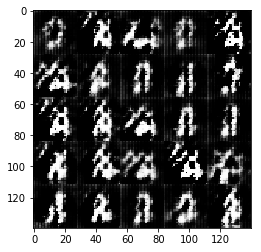

Epoch 1/2... Discriminator Loss: 1.3026... Generator Loss: 1.5187
Epoch 1/2... Discriminator Loss: 1.3149... Generator Loss: 0.8618
Epoch 1/2... Discriminator Loss: 1.2183... Generator Loss: 1.1130
Epoch 1/2... Discriminator Loss: 1.2987... Generator Loss: 0.8191
Epoch 1/2... Discriminator Loss: 0.9907... Generator Loss: 1.1510
Epoch 1/2... Discriminator Loss: 1.2360... Generator Loss: 0.9782
Epoch 1/2... Discriminator Loss: 1.2263... Generator Loss: 0.8817
Epoch 1/2... Discriminator Loss: 1.2387... Generator Loss: 1.1222
Epoch 1/2... Discriminator Loss: 1.1914... Generator Loss: 1.0176
Epoch 1/2... Discriminator Loss: 1.4790... Generator Loss: 0.6653


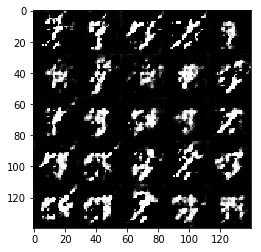

Epoch 1/2... Discriminator Loss: 1.0303... Generator Loss: 1.6775
Epoch 1/2... Discriminator Loss: 1.2972... Generator Loss: 1.2054
Epoch 1/2... Discriminator Loss: 1.1312... Generator Loss: 1.1724
Epoch 1/2... Discriminator Loss: 1.0640... Generator Loss: 1.8094
Epoch 1/2... Discriminator Loss: 1.0094... Generator Loss: 1.0499
Epoch 1/2... Discriminator Loss: 1.2319... Generator Loss: 0.9248
Epoch 1/2... Discriminator Loss: 1.0844... Generator Loss: 1.0928
Epoch 1/2... Discriminator Loss: 1.3528... Generator Loss: 0.9722
Epoch 1/2... Discriminator Loss: 1.2656... Generator Loss: 1.1443
Epoch 1/2... Discriminator Loss: 1.2191... Generator Loss: 1.0230


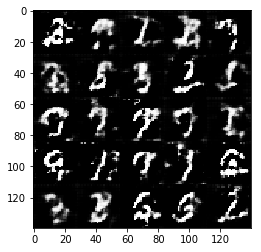

In [ ]:
batch_size = 124
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Tensor("real_input:0", shape=(?, 28, 28, 3), dtype=float32)
Tensor("z_input:0", shape=(?, 100), dtype=float32)
Tensor("learning_rate:0", dtype=float32)
Epoch 1/1... Discriminator Loss: 1.3873... Generator Loss: 0.7721
Epoch 1/1... Discriminator Loss: 1.3811... Generator Loss: 0.8326
Epoch 1/1... Discriminator Loss: 1.4023... Generator Loss: 0.6832
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.7884
Epoch 1/1... Discriminator Loss: 1.3406... Generator Loss: 0.8737
Epoch 1/1... Discriminator Loss: 1.4939... Generator Loss: 0.7248
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.7246
Epoch 1/1... Discriminator Loss: 1.3761... Generator Loss: 0.8166
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.8285
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.7690


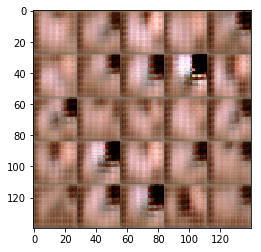

Epoch 1/1... Discriminator Loss: 1.3636... Generator Loss: 0.8295
Epoch 1/1... Discriminator Loss: 1.3589... Generator Loss: 0.8199
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.7617
Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.7919
Epoch 1/1... Discriminator Loss: 1.3877... Generator Loss: 0.7899
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.8253
Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 0.7723
Epoch 1/1... Discriminator Loss: 1.3484... Generator Loss: 0.7715
Epoch 1/1... Discriminator Loss: 1.3452... Generator Loss: 0.7243
Epoch 1/1... Discriminator Loss: 1.3724... Generator Loss: 0.8106


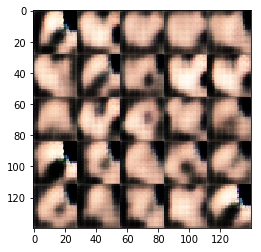

Epoch 1/1... Discriminator Loss: 1.3693... Generator Loss: 0.8111
Epoch 1/1... Discriminator Loss: 1.3580... Generator Loss: 0.7869
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.7629
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.8188
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.7620
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.7988
Epoch 1/1... Discriminator Loss: 1.3740... Generator Loss: 0.7565
Epoch 1/1... Discriminator Loss: 1.3691... Generator Loss: 0.8092
Epoch 1/1... Discriminator Loss: 1.3821... Generator Loss: 0.7434
Epoch 1/1... Discriminator Loss: 1.3718... Generator Loss: 0.7653


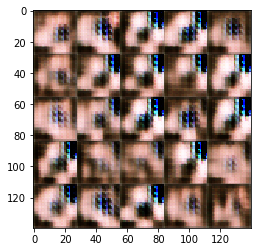

Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.8153
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.8243
Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.8162
Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.8038
Epoch 1/1... Discriminator Loss: 1.3846... Generator Loss: 0.7800
Epoch 1/1... Discriminator Loss: 1.3754... Generator Loss: 0.7879
Epoch 1/1... Discriminator Loss: 1.3711... Generator Loss: 0.8233
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.7740
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.8134
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 0.7781


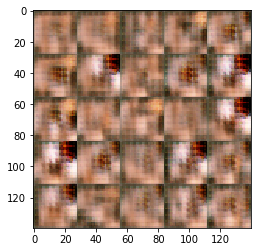

Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.7686
Epoch 1/1... Discriminator Loss: 1.3843... Generator Loss: 0.7780
Epoch 1/1... Discriminator Loss: 1.3674... Generator Loss: 0.8107
Epoch 1/1... Discriminator Loss: 1.3718... Generator Loss: 0.7627
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.8404
Epoch 1/1... Discriminator Loss: 1.3749... Generator Loss: 0.7966
Epoch 1/1... Discriminator Loss: 1.3796... Generator Loss: 0.7769
Epoch 1/1... Discriminator Loss: 1.3735... Generator Loss: 0.7989
Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 0.8046
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.7920


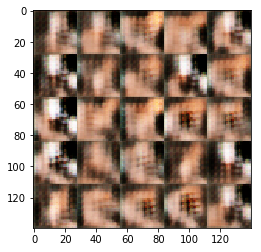

Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.8335
Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 0.7732
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.8000
Epoch 1/1... Discriminator Loss: 1.3757... Generator Loss: 0.7942
Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.7890
Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.8129
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.7821
Epoch 1/1... Discriminator Loss: 1.3876... Generator Loss: 0.7585
Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 0.8292
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.7960


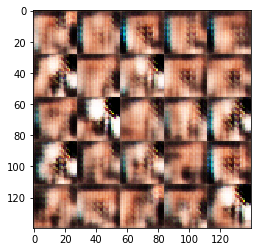

Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 0.8025
Epoch 1/1... Discriminator Loss: 1.3644... Generator Loss: 0.7852
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.7809
Epoch 1/1... Discriminator Loss: 1.3776... Generator Loss: 0.7894
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.7786
Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 0.7968
Epoch 1/1... Discriminator Loss: 1.3787... Generator Loss: 0.7960
Epoch 1/1... Discriminator Loss: 1.3656... Generator Loss: 0.8015
Epoch 1/1... Discriminator Loss: 1.3711... Generator Loss: 0.8136
Epoch 1/1... Discriminator Loss: 1.3739... Generator Loss: 0.7481


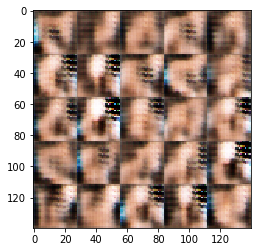

Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 0.7699
Epoch 1/1... Discriminator Loss: 1.3801... Generator Loss: 0.8318
Epoch 1/1... Discriminator Loss: 1.3707... Generator Loss: 0.7950
Epoch 1/1... Discriminator Loss: 1.3772... Generator Loss: 0.8201
Epoch 1/1... Discriminator Loss: 1.3807... Generator Loss: 0.7810
Epoch 1/1... Discriminator Loss: 1.3787... Generator Loss: 0.7988
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.7724
Epoch 1/1... Discriminator Loss: 1.3759... Generator Loss: 0.7563
Epoch 1/1... Discriminator Loss: 1.3712... Generator Loss: 0.8016
Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.7790


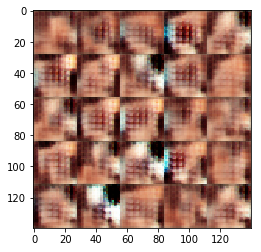

Epoch 1/1... Discriminator Loss: 1.3840... Generator Loss: 0.7923
Epoch 1/1... Discriminator Loss: 1.3724... Generator Loss: 0.7654
Epoch 1/1... Discriminator Loss: 1.3787... Generator Loss: 0.7875
Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 0.7736
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.7722
Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.8326
Epoch 1/1... Discriminator Loss: 1.3739... Generator Loss: 0.8108
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.7681
Epoch 1/1... Discriminator Loss: 1.3667... Generator Loss: 0.8224
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.7414


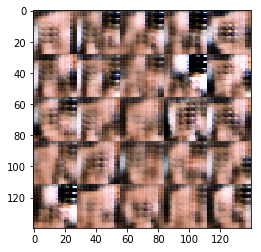

Epoch 1/1... Discriminator Loss: 1.3698... Generator Loss: 0.7906
Epoch 1/1... Discriminator Loss: 1.3777... Generator Loss: 0.8101
Epoch 1/1... Discriminator Loss: 1.3724... Generator Loss: 0.8005
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.8048
Epoch 1/1... Discriminator Loss: 1.3758... Generator Loss: 0.7786
Epoch 1/1... Discriminator Loss: 1.3749... Generator Loss: 0.7998
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.8127
Epoch 1/1... Discriminator Loss: 1.3795... Generator Loss: 0.8504
Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 0.8001
Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 0.8459


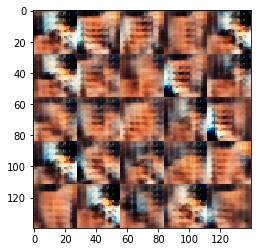

Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.7851
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.8184
Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 0.7627
Epoch 1/1... Discriminator Loss: 1.3752... Generator Loss: 0.7954
Epoch 1/1... Discriminator Loss: 1.3720... Generator Loss: 0.7937
Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.7852
Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.8175
Epoch 1/1... Discriminator Loss: 1.3839... Generator Loss: 0.7639
Epoch 1/1... Discriminator Loss: 1.3759... Generator Loss: 0.8022
Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.7810


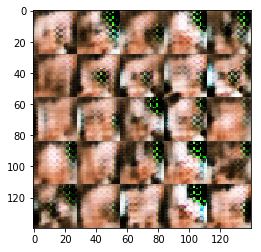

Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.7884
Epoch 1/1... Discriminator Loss: 1.3798... Generator Loss: 0.7723
Epoch 1/1... Discriminator Loss: 1.3821... Generator Loss: 0.7967
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.7854
Epoch 1/1... Discriminator Loss: 1.3717... Generator Loss: 0.8514
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.8048
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.8150
Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 0.7903
Epoch 1/1... Discriminator Loss: 1.3834... Generator Loss: 0.7988
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.8061


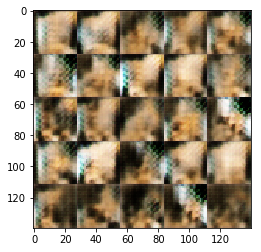

Epoch 1/1... Discriminator Loss: 1.3733... Generator Loss: 0.8030
Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.8126
Epoch 1/1... Discriminator Loss: 1.3720... Generator Loss: 0.7879
Epoch 1/1... Discriminator Loss: 1.3651... Generator Loss: 0.8089
Epoch 1/1... Discriminator Loss: 1.3853... Generator Loss: 0.7925
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.7619
Epoch 1/1... Discriminator Loss: 1.3769... Generator Loss: 0.7977
Epoch 1/1... Discriminator Loss: 1.3775... Generator Loss: 0.7892
Epoch 1/1... Discriminator Loss: 1.3868... Generator Loss: 0.7857
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.7699


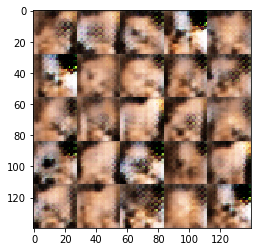

Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 0.8136
Epoch 1/1... Discriminator Loss: 1.3791... Generator Loss: 0.7963
Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 0.7844
Epoch 1/1... Discriminator Loss: 1.3708... Generator Loss: 0.7964
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.7498
Epoch 1/1... Discriminator Loss: 1.3779... Generator Loss: 0.7809
Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.8089
Epoch 1/1... Discriminator Loss: 1.3883... Generator Loss: 0.7992
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.8031
Epoch 1/1... Discriminator Loss: 1.3853... Generator Loss: 0.7555


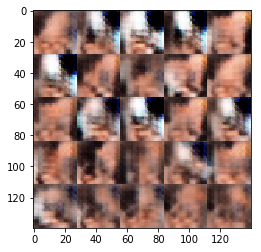

Epoch 1/1... Discriminator Loss: 1.3844... Generator Loss: 0.8092
Epoch 1/1... Discriminator Loss: 1.3734... Generator Loss: 0.7824
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.7617
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.8002
Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.8035
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.7942
Epoch 1/1... Discriminator Loss: 1.3740... Generator Loss: 0.7788
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.7853
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 0.8001
Epoch 1/1... Discriminator Loss: 1.3749... Generator Loss: 0.8189


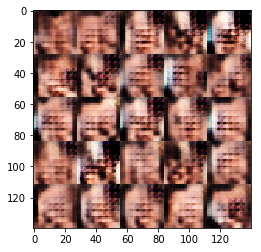

Epoch 1/1... Discriminator Loss: 1.3751... Generator Loss: 0.8029
Epoch 1/1... Discriminator Loss: 1.3898... Generator Loss: 0.7925
Epoch 1/1... Discriminator Loss: 1.3702... Generator Loss: 0.7868
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.7726
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.7989
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.8021
Epoch 1/1... Discriminator Loss: 1.3752... Generator Loss: 0.7750
Epoch 1/1... Discriminator Loss: 1.3830... Generator Loss: 0.7907
Epoch 1/1... Discriminator Loss: 1.3691... Generator Loss: 0.8176
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.8020


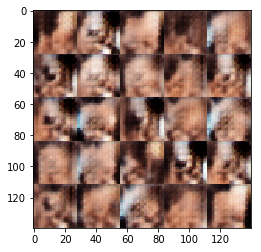

Epoch 1/1... Discriminator Loss: 1.3796... Generator Loss: 0.8181
Epoch 1/1... Discriminator Loss: 1.3837... Generator Loss: 0.7600
Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.7912


In [25]:
batch_size = 124
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.